# Active Learning Tutorials

## Get started in Colab
1. Klicke auf [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//IIS-KI-Tutorials/KI-Tutorials/blob/main/Active_Learning_Tutorials.ipynb) um dieses Notebook als Session in Colab zu starten.
<br/>------In Colab------------------------------------------------------------------------
2. Führe die nächste Zelle aus um die benötigten Daten in die Session zu laden und um benötigte Requirements zu installieren.
3. Klicke anschließend im Output der Zelle auf "**Restart Session**".

In [ ]:
!wget -P ./data https://raw.githubusercontent.com/IIS-KI-Tutorials/KI-Tutorials/main/data/Cancer/data_dev.csv
!wget -P ./data https://raw.githubusercontent.com/IIS-KI-Tutorials/KI-Tutorials/main/data/Cancer/data_test.csv
!pip install modal scikit-activeml ipyannotations superintendent

-------------AB HIER BEGINNEN DIE EIGENTLICHEN TUTORIALS--------------------

## Inhaltsverzeichnis
1. **Grundlagen von Active Learning** <br/><br/>
Was ist Active Learning? Warum und wann sollte ich es nutzen? Wie funktioniert Active Learning? Welche Tool gibt es in Python für Active Learning?
<br/><br/>

2. **Klassifikation tabellarischer Daten mit Scikit ActiveML**<br/><br/>
Beispiel zur Klassifizierung von Brustkrebs mit tabellarischen Daten und Einfühung in den Active Learning Framework Scikit ActiveML.<br/><br/>
3. **Regression tabellarischer Daten in modAL**<br/><br/>
Einführung in den Framework modAL und zeigt anhand einem Toy-Dataset auf welche Besonderheiten bei Regressionsproblem im Kontext von Active LEarning berücksichtigt werden müssen. <br/><br/>
4. **Interaktive Implementierung des Active Learning Cycles mit Superintendent**<br/><br/>
Einfaches Beispiel zur Umsetzung von Active Learning in einer interactiven Umgebung. 

## 1. Grundlagen von Active Learning

>Die Grundidee von Active Learning besteht darin, dass ein maschineller Lernalgorithmus mit weniger Trainingsaufwand bessere Leistungen erbringen kann, wenn er die Daten, aus denen er lernt, selbst auswählen kann.

Active Learning ist eine wirkungsvolle Methode im Bereich des maschinellen Lernens, die darauf abzielt, den Aufwand für das Labeln von Daten zu reduzieren, ohne die Vorhersagequalität der Modelle zu beeinträchtigen. Diese Technik wird insbesondere dann eingesetzt, wenn die Kosten für das Labeling großer Datenmengen sehr hoch sind.

### Warum Active Learning?
Active Learning ist eine äußerst effektive Methode im Bereich des maschinellen Lernens, die aus mehreren Gründen bevorzugt wird:

**Kostenersparnis**: In vielen Anwendungen, insbesondere in der Medizin oder im juristischen Bereich, sind Experten notwendig, um Daten zu labeln. Dies ist teuer und zeitaufwändig. Active Learning hilft, diese Kosten zu senken, indem es gezielt die informativsten Datenpunkte zur Labelung auswählt.

**Effizienz**: Beim herkömmlichen passiven Lernen, werden vorab viele Datenpunkte gelabelt. Dabei wird vernachlässigt, das einige Datenpunkte in den Daten kaum Mehrwert für die resultierende Modellgenauigkeit liefern, da diese größtenteils redundante Informationen tragen. Beim Active Learning hingegen werden die Daten iterativ gelabelt und meist kann bereits in den ersten Schritten vernünftige Modelle trainiert werden. Dieser Ansatz spart somit Zeit und Rechenressourcen.

**Schnelle Anpassung**: In Anwendungsfällen, in denen sich die Datenverteilung im Laufe der Zeit ändert, kann Active Learning dazu verwendet werden, das Modell schnell anzupassen, indem es neue, relevante Datenpunkte in den Trainingsdatensatz aufnimmt.


### Der Active Learning Cycle

**Terminologie:**<br> Als **Datenpool** wird die Menge aller noch nicht gelabelten Daten bezeichnet. Mit **Trainingsdaten** ist die Menge aller bereits gelabelten Datenpunkte gemeint.

1. **Ausgangssituation**: Man hat einen Pool an ungelabelten Daten.
2. **Kaltstart**: Man wählt zunächst per Zufall ein paar Datenpunkte und bestimmt deren Klassenzugehörigkeit.
3. **Training**: Man trainiert mit den aktuellen Trainingsdaten ein neues Modell. Zu Evaluation kann man auf K-Fold Splitting nutzen. Ist man mit der Genauigkeit des Modells zufrieden, kann man an dieser Stelle aufhören und den Zyklus beenden.
4. **Evaluation des Datapool**: Entscheide welcher Datenpunkt als nächstes gelabelt werden soll. Es gibt hier eine ganze Reihe von Kriterien, die als Maßstab verwendet werden können, um den nächsten Datenpunkt zu bestimmen. Die meisten davon bewerten entweder die Ungewissheit des Modells gegenüber des Datenpunkt oder die Diversität des Datenpunkt gegenüber den bestehenden Trainingsdaten. 
5. **Labeling**: Bestimme die Klasse des neuen Datenpunkts und füge ihn zu den Trainingsdaten hinzu.
6. Zurück zu Schritt 3.

![ ](./assets/active_learning_de.gif)

Die Darstellung illustriert den Active Learning Cycle. Zu sehen ist, wie eine lineare SVM iterativ neu trainiert wird. Dabei wird in jedem Schritt der Datenpunkt aus dem Pool gelabelt, welcher der Entscheidungsgrenze am nächsten liegt und somit am unsichersten einer der beiden Klasse zugeordnet werden kann. Nachdem etwa die Hälfte aller Datenpunkte gelabelt wurde, verändert sich die Entscheidungsgrenze nicht mehr, da alle Supportvektoren und damit alle relevanten Datenpunkte bereits in den Trainingsdaten enthalten sind. Es konnte folglich mit nur der Hälfte der Daten das optimale Model ermittelt werden.


### Auswahl von Active Learning-Strategien
Um Active Learning effektiv umzusetzen, benötigt man eine gute Strategie, um in jedem Schritt den/die nächsten Datenpunkt(e) aus dem Datenpool zu bestimmen. Es gibt viele verschiedene Strategien, um den nächsten Datenpunkt zum Labeln auszuwählen. Dabei gibt es zudem nicht die eine Strategie, die immer am besten funktioniert. Es muss daher anwendungsindividuell entschieden werden, welche Strategie geignet sein könnte.
Die meisten in der Literatur erwähnten Strategien lassen sich dabei in 3 Gruppen einordnen.

#### Unsicherheitsbasiertes Sampling
Diese Strategien wählen Datenpunkte aus, bei denen das Modell unsicher ist. Dazu gehören Punkte, bei denen die Vorhersageunsicherheit hoch ist, wie beispielsweise Datenpunkte nahe der Klassengrenze oder mit hoher Entropie in der Vorhersageverteilung.

#### Diversitätsbasiertes Sampling
Um die Diversität der Trainingsdaten zu erhöhen, werden Datenpunkte ausgewählt, die repräsentativ für verschiedene Bereiche des Merkmalsraums sind. Dies hilft, Overfitting zu vermeiden und sicherzustellen, dass das Modell robust ist. Enthalten die Daten jedoch viele Ausreißer, kann dies jedoch auch dazu führen, dass vorwiegend diese zu den Trainingsdaten aufgenommen werden.

#### Fehlerkorrekturbasiertes Sampling
Diese Strategien zielen darauf ab, Fehler zu korrigieren, die das Modell bereits gemacht hat. Datenpunkte, die in der Nähe von falsch klassifizierten Punkten liegen, werden ausgewählt, um das Modell zu verbessern.

### Python Frameworks für Active Learning
In den folgenden Notebooks werden Beispiele für die Umsetzung von Active Learning mit verschiedenen Frameworks in Python gezeigt. Ähnlich wie bei den Strategien, gilt auch hier, jedes Framework hat seine Stärken und Schwächen und sollte entsprechend der Problemanforderungen passend gewählt werden. Im Folgenden fassen wir kurz einige der Frameworks zusammen. 
#### modAL
Ein flexibles und modulares Framework zur Implementierung von Active Learning. Große Auswahl an Algorithmen und Entscheidungskriterien. Kompatibel mit scikit-learn und individuell anpassbar. ([Dokumentation](https://modal-python.readthedocs.io/en/latest/), siehe Notebook 2)
#### Superintendent
Eine Sammlung von Widgets für Jupyter-Notebooks. Einfache Implementierung des Active Learning Cycle mit interaktiven Labeling Widgets. Erstellt mit ipywidgets und ipyannotations, um schnelle und effiziente Lösungen zu schaffen.
([GitHub](https://github.com/janfreyberg/ipyannotations))

#### Scikit ActiveML
Ähnlich wie modAL, etwas weniger anpassbar, dafür etwas einfacher zu benutzen. Integriert auch bereits interaktive Labeling Widgets.([Dokumentation](https://scikit-activeml.github.io/scikit-activeml-docs/index.html))

#### PyRelationAL
Ein leistungsstarkes Paket für Forschung und fortgeschrittene Active Learning-Anwendungen. ([GitHub](https://github.com/RelationRx/pyrelational))

### Zusammenfassung

Active Learning stellt eine attraktive Alternative zum herkömmlichen "Passive Learning" dar. Insbesondere in Anwendungen, bei denen das Labeln der Daten kostspielig und zeitaufwändig ist, kann Active Learning dazu beitragen, den Aufwand zu reduzieren. 
Die erfolgreiche Umsetzung hängt vor allem von der gewählten Strategie ab, mit der in jeder Iteration entschieden wird, welche Datenpunkte gelabelt und den Trainingsdaten hinzugefügt werden sollen.
Es existiert zudem eine Vielzahl von Frameworks, die bei der Implementierung des Active Learning Cycles unterstützen können. Es gibt keine allgemeingültige "beste" Wahl für alle Anwendungen, sondern vielmehr sollte je nach den spezifischen Anforderungen der Problemstellung ein passendes Framework ausgewählt werden.

Konkrete Anwenungsbeispiele finden Sie in den weiteren Notebooks.

## 2. Klassifikation mit Scikit ActiveML 

In diesem Beispiel befassen wir uns mit der Klassifizierung von Brustkrebs. Der Labelingprozess für Brustkrebsdiagnosen erfordert Expertenwissen und ist zeitaufwendig. Daher möchten wir Active Learning nutzen, um die Kosten und den Zeitaufwand für das Labeling zu reduzieren. Active Learning ermöglicht es uns, intelligent die informativsten Proben für das Labeling auszuwählen, wodurch der Bedarf an gelabelten Daten verringert wird.

### Imports <a id='Imports'></a>

Die Python-Bibliotheken `pandas` und `numpy` finden Anwendung beim Laden und Verarbeiten von Daten. Zur Erstellung von Visualisierungen bedienen wir uns der Bibliothek `matplotlib`. Für die Umsetzung von Klassifikationsaufgaben verwenden wir eine Support Vector Machine (`SVC` aus der `sklearn`-Bibliothek).

Spezifische Funktionen, die im Kontext des Active Learning gebraucht werden, werden aus dem Modul `skactiveml` bezogen. Konkret importieren wir die Klasse `SklearnClassifier` aus dem Modul `skactiveml.classifier`. Diese dient als Erweiterung eines Sklearn-Klassifikators und ermöglicht eine nahtlose Einbindung in den Active Learning-Prozess.

Die Implementierung des Auswahlstrategie wird durch die Klasse `UncertaintySampling` aus `skactiveml.pool` zur Verfügung gestellt. Zusätzlich nutzen wir die Funktionen `unlabeled_indices` und `MISSING_LABEL` aus dem Modul `skactiveml.utils`, um mit fehlenden Labels umzugehen.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from skactiveml.pool import UncertaintySampling
from skactiveml.utils import unlabeled_indices, MISSING_LABEL
from skactiveml.classifier import SklearnClassifier

from warnings import filterwarnings
filterwarnings("ignore")

### Laden der Daten
Die Daten stammen aus dem [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) und sind als "Breast Cancer Wisconsin (Diagnostic) Dataset" bekannt. Sie enthalten Informationen zu verschiedenen Merkmalen von Brustgewebeproben und die Zielvariable gibt an, ob ein Tumor gutartig (benign) oder bösartig (malignant) ist.
Die Daten wurden bereits vorab normalisiert und in Entwicklungs- und Testdaten unterteilt.

Die tatsächlichen Labels werden in der Variable `y_true` gespeichert. Bitte beachten Sie, dass in einem realen Szenario diese Labels nicht verfügbar wären. Zusätzlich wird die Variable `y` als leeres Array mit derselben Größe initialisiert und wird nach und nach mit den im Active Learning Cycle bestimmten Labels befüllt.

In [ ]:
data_dev = pd.read_csv("./data/cancer/data_dev.csv")
data_test = pd.read_csv("./data/cancer/data_test.csv")

X = data_dev.drop(columns=['label'])
y_true = data_dev['label']
y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)

X_test = data_test.drop(columns=['label'])
y_test = data_test['label']

### Initialisierung

Um einen Klassifikator zu initialisieren, erstellen wir eine Instanz der Klasse `SklearnClassifier`. Diese benötigt einen Sklearn-Estimator, die Namen der möglichen verschiedenen Klassen und optional noch einen random_state, damit dsa Experiment reproduzierbar ist.

Für unser Beispiel verwenden wir den SVC (Support Vector Classifier) von sklearn als Estimator und die Klassen aus den tatsächlichen Labels `y_true` als Namen der möglichen verschiedenen Klassen.

In [ ]:
clf = SklearnClassifier(
    estimator=SVC(probability=True), 
    classes=np.unique(y_true),
    random_state=42
)

Als nächstes initialsieren wir unser Entscheidungskriterium (Query Strategie), nach welchem die Datenpunkte ausgewählt werden. Dazu initialiseren wir eine Instanz der Klasse `UncertaintySampling` und übergeben als String die gewünschte Methode. Zur Auswahl stehen `entropy`, `least_confident`, `margin_sampling` und `expected_average_precision`.

In [ ]:
qs = UncertaintySampling(method='entropy')

### Umsetzung des Active Learning Cycles



Als initiale Trainingsdaten verwenden wir die ersten 10 Indizes (Kaltstart). Natürlich kennen wir auch die Klassen aller restlichen Datenpunkte, aber wir tun nun so, als würden wir nur die Label der ersten 10 Datenpunkte kennen.

In [ ]:
y[:10] = y_true[:10]
y[:30] # Zeigt die ersten 30 Labels an

array([ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1., nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

Wir implementieren den Active Learning Cycle mithilfe einer FOR-Schleife, die `n_cycles` Iterationen durchläuft. In jeder Iteration erfolgt zuerst das Training eines Modells mit den aktuellen Trainingsdaten, gefolgt von einer Bewertung seiner Leistung anhand der Testdaten. Die Ergebnisse dieser Bewertungen werden in der Liste `performance` gespeichert. Danach nutzen wir unser Entscheidungskriterium, um den Datenpunkt zu identifizieren, der derzeit am unsichersten einer bestimmten Klasse zugeordnet ist. Wir bestimmen das Label für diesen Datenpunkt und fügen ihn den Trainingsdaten hinzu. 

In [ ]:
n_cycles = 140
performance = []

# Active Learning Cycle
np.random.seed(42)
for cycle in range(n_cycles):
    print(f"Query no. {cycle+1} of {n_cycles}", end="\r")
    clf.fit(X,y)
    performance.append(clf.score(X_test, y_test))
    query_idx = qs.query(X=X, y=y, clf=clf, batch_size=1)
    y[query_idx] = y_true[query_idx]

### Evaluation
Um die von uns gewählte Strategie zu bewerten, vergleichen wir diese mit einer zufälligen Auswahl der Datenpunkte (Random-Strategie).


In [ ]:
#Initialisierung des Klassifikators
clf_random = SklearnClassifier(
    estimator=SVC(probability=True),
    classes=np.unique(y_true)
)

#Initialiserung der Daten
y_random = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)
y_random[:10] = y_true[:10]

#Initialisierung der Performance Liste
performance_random = []

# Random Learning Cycle
np.random.seed(42)
for c in range(n_cycles):
    print(f"Query no. {c+1} of {n_cycles}", end="\r")
    clf_random.fit(X,y_random)
    performance_random.append(clf_random.score(X_test, y_test))
    query_idx = np.random.choice(unlabeled_indices(y_random), size=1, replace=False) # Zufällige Auswahl eines noch nicht gelabelten Datensatzes
    y_random[query_idx] = y_true[query_idx]

Zum Vergleich visualisieren wir die Performance der beiden Strategien.

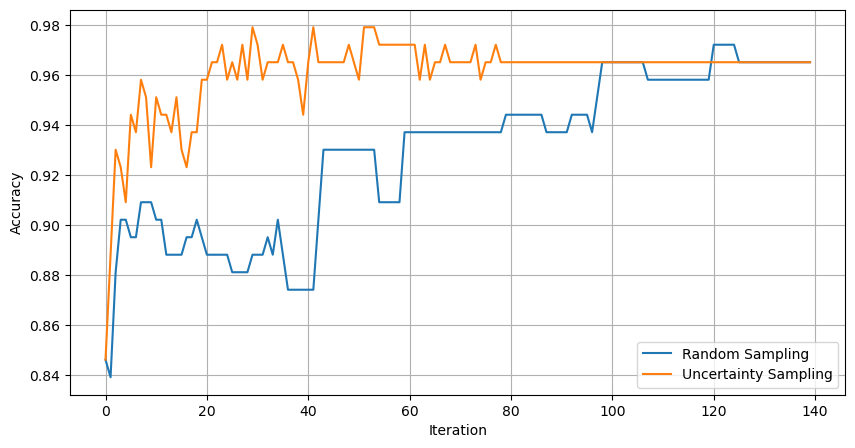

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(performance_random, label="Random Sampling")
plt.plot(performance, label="Uncertainty Sampling")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.legend(loc=4)
plt.show()

Je nach random_state, können die Ergebnisse etwas variieren. Generell lässt sich jedoch beobachten, dass die gewählte Strategie (orange) im Vergleich zur zufälligen Auswahl der Datenpunkte (blau) schneller - das heißt nach weniger Iterationen - zur maximalen Genauigkeit konvergiert. Beim Uncertainty Sampling steigt die Genauigkeit zu Beginn schnell an und bewegt sich bereits nach lediglich 20 Iterationen um ein Niveau von knapp über 96%, ehe ab 80 Iterationen eine stabile Genauigkeit zu beobachten ist. Die zufällige Auswahl-Strategie hingegen erreicht diesen Zustand erst deutlich später.

Mit dem trainierten Modell kann nun entweder direkt weitergearbeitet werden, oder man exportiert das Modell mit Hilfe einer Bibliothek wie z.B. pickle. Die bestimmten Labels wurden in der Variable `y` abgespeichert.

In [ ]:
y

array([ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1., nan, nan,  0.,
        0., nan, nan, nan, nan, nan, nan, nan,  0., nan, nan, nan, nan,
        0., nan,  0., nan, nan, nan, nan, nan,  0., nan, nan, nan,  1.,
       nan,  0.,  1., nan, nan, nan, nan,  1.,  1., nan, nan, nan, nan,
       nan, nan, nan,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan,
        1., nan, nan, nan,  1.,  0., nan, nan, nan, nan,  1.,  0.,  1.,
       nan, nan, nan, nan,  1.,  0.,  1., nan,  0., nan, nan,  0.,  0.,
       nan, nan, nan, nan, nan,  0., nan,  0., nan,  0., nan, nan, nan,
        0.,  1.,  0., nan, nan,  0., nan, nan, nan,  1., nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,
       nan,  1.,  0.,  1., nan, nan,  1.,  0.,  1., nan, nan,  0.,  1.,
        1.,  0.,  0., nan, nan, nan, nan, nan,  1., nan, nan,  0.,  1.,
       nan, nan, nan,  1., nan,  1., nan, nan, nan,  1., nan, nan, nan,
       nan, nan, nan, nan,  1., nan, nan,  0., nan, nan,  1.,  1

## 3. Regression mit modAL
Im Gegesatz zur Klassifikation ist es bei der Regression nicht ganz so einfach, ein gutes Maß für die Unsicherheit gegenüber einem neuen Datenpunkt zu bestimmen. Eine häufig angewandte Möglichkeit ist es, anstelle von nur einem Modell, ein ganzes Ensemble an verschiedenen Modellen zu trainieren und dann Datenpunkte zu wählen, bei denen sich die Modelle am stärksten gegenseitig widersprechen. Konkret verwenden wir hierbei die maximale Standardabweichung der Vorhersagen der verschiedenen Modelle als Kriterium, um die Unsicherheit zu quantifizieren. Die Standardabweichung ergibt sich aus den unterschiedlichen Vorhersagen, die jedes Modell für einen bestimmten Datenpunkt liefert. Indem wir die maximale Standardabweichung wählen, identifizieren wir diejenigen Datenpunkte, bei denen die Modelle die größten Abweichungen voneinander aufweisen und somit die Unsicherheit am größten ist.

### Imports

Die Bibliotheken `pandas` und `numpy` werden verwendet, um Daten zu laden und zu verarbeiten. `matplotlib` und `seaborn` werden verwendet, um Visualisierungen zu erstellen. Aus `sklearn` verwenden wir verschiedene Regressionsalgorithmen und Metriken.
Alle Active Learning spezifische Funktionen erhalten wir aus dem Modul `modAL`. 
Wir importieren dazu die Klassen `ActiveLearner` und `CommitteeRegressor` aus `modAL.models`. Die Klasse `ActiveLearner` ist die Basisklasse für alle Active Learning Modelle in modAL. Die Klasse `CommitteeRegressor` stellt die erforderlichen Funktionen für Active Learning Regression mit Ensembles zur Verfügung.

Für unser Auswahlkriterium `max_std_sampling` importieren wir die entsprechende Funktion aus dem Modul `modAL.disagreement`.

In [ ]:
#Grundlegende Imports
from itertools import cycle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

#Active learning spezifische Imports
from modAL.models import ActiveLearner, CommitteeRegressor
from modAL.disagreement import max_std_sampling

#Regressions Modelle
from sklearn.linear_model import LinearRegression, Ridge, Lasso, PoissonRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

#Metriken
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Erzeugen der Daten

Für dieses Beispiel verwenden wir syntetische Daten welche wir mit Hilfe der Funktion `make_regression` von `sklearn.datasets` erzeugen.

In [ ]:
X, y = make_regression(n_samples=1000,
                       n_features=3,
                       n_informative=2,
                       random_state=42,
                       noise=2
                      )
X_dev, X_test, y_dev, y_test = train_test_split(X, y, random_state=42, shuffle=True)

### Initialisierung des Ensembles

Zunächst muss das Ensemble initialisiert werden, dazu mussen folgende Kriterien festgelegt werden:
- **Anzahl der Modelle:** Es ist ratsam, die Ensemble-Gruppe aus einer Vielzahl von Modellen zusammenzustellen. Die Stärken eines Ensembles treten besonders hervor, wenn die enthaltenen Modelle eine facettenreiche Vielfalt aufweisen und somit Abweichungen in den Vorhersagen präsentieren. Diese Diversität innerhalb der Modelle kann auf unterschiedliche Weisen erzielt werden. Es besteht die Möglichkeit, jedem Modell verschiedene Trainingsdaten zuzuweisen, unterschiedliche Algorithmen einzusetzen oder auf das Prinzip des Bootstrappings zurückzugreifen. Beim Bootstrapping wird für jede Trainingsrunde eine spezifische Untergruppe aus den verfügbaren Trainingsdaten zufällig ausgewählt, die in diesem Schritt genutzt wird. In der vorliegenden Situation kombinieren wir sowohl das Bootstrapping-Prinzip als auch den Einsatz verschiedener Algorithmen, um die Variabilität unserer Ensemble-Modelle zu maximieren.
- **Initiale Trainingsdaten:** Die Entscheidung über die Menge an initial gelabelten Datenpunkten erfordert eine sorgfältige Abwägung. Eine zu knappe Auswahl könnte dazu führen, dass diese wenigen Datenpunkte zufällig ungünstig gewählt sind und dadurch die ersten Modelle in unerwünschter Weise beeinflussen. Es ist jedoch ebenso wichtig, eine übermäßige Vorlabelung von Datenpunkten zu vermeiden, da dies ineffizient wäre. Das Ziel besteht darin, eine ausgewogene Menge an initialen Datenpunkten zu wählen, um das Ensemble solide zu initialisieren.
- **Auswahlkriterium:** Bei Regressionsaufgaben hat sich üblicherweise bewährt, den Datenpunkt aus dem Datenpool zu wählen, der die höchste Standardabweichung zwischen den Vorhersagen der einzelnen Modelle aufweist. Auf diese Weise wird derjenige Datenpunkt ausgewählt, der die größte Diskrepanz bzw. Uneinigkeit zwischen den Modellen zeigt.
<br/><br/>
Für diese Aufgabe stellt ModAL die Klasse `CommitteeRegressor` bereit. Diese umfasst eine Liste von `ActiveLearner` und eine `query_strategy`.  Jede Instanz von `ActiveLearner` umfasst wiederum einen Sklearn kompatiblen Estimator und die initialen Trainingsdaten für das jeweilige Model. ([siehe Dokumentation](https://modal-python.readthedocs.io/en/latest/content/apireference/models.html))

In [ ]:
X_pool, y_pool = X_dev.copy(), y_dev.copy()

# Liste an Regressionsalgorithmen, die wir in unserem Ensemble verwenden wollen
regression_algo_list = [LinearRegression, Ridge, Lasso, DecisionTreeRegressor, GaussianProcessRegressor] 

init_train_size = 20 # Menge an initialen Trainingsdaten, die wir zufällig auswählen und labeln
init_idx = np.random.choice(range(X_pool.shape[0]), size=init_train_size, replace=False)
# Erstellt eine Liste von ActiveLearner-Objekten, die wir in unserem Ensemble verwenden wollen.
learner_list = [
    ActiveLearner(
        # Regressions-Algorithmus
        estimator=Regressor(random_state=42) if hasattr(Regressor.__init__, 'random_state') else Regressor(),
        X_training=X_pool[init_idx],
        y_training=y_pool[init_idx], # Zielwert der Trainingsdaten
        bootstrap_init=True, # Nutze Bootstraping um zusätzliche Variation zwischen den Modellen zu erzeugen
    )
    for Regressor in regression_algo_list
    ]

#Entfernt die initialen Trainingsdaten aus dem Datenpool, damit diese nicht doppelt ausgewählt werden.
X_pool = np.delete(X_pool, init_idx, axis=0)
y_pool = np.delete(y_pool, init_idx)

# Committee ist hier das selbe wie ein Ensemble.
ensemble = CommitteeRegressor(
    learner_list=learner_list, #Vorab definierte Liste an Modellen
    query_strategy=max_std_sampling # Strategie zur Bestimmung der Label-Reihenfolge
)

### Umsetzung des Active Learning Cycles
Um später die Genauigkeit der Modelle im Vergleich zur zufälligen Auswahl der Datenpunkte zu bewerten, speichern wir in jeder Iteration den durchschnittlichen absoluten Fehler (MAE) des aktuellen Ensembles auf den Testdaten.

In [ ]:
performance = [mean_absolute_error(y_test, ensemble.predict(X_test))] # Liste zum Speichern der Genauigkeit (MAE) der Modelle auf den Testdaten
n_queries = 50 #Legt die Anzahl der Iterationen fest
samples_per_iter = 4

Nach der erfolgreichen Initialisierung des Ensembles setzen wir den Active Learning Zyklus in Gang. Hierbei bedienen wir uns einer FOR-Schleife, bei der im Vorfeld die gewünschte Anzahl der Iterationen festgelegt wird. Eine alternative Option besteht darin, eine WHILE-Schleife zu verwenden, welche in jedem Durchlauf überprüft, ob bestimmte Zielkriterien erfüllt sind.

Es gibt keine zwingende Einschränkung, in jeder Iteration lediglich nur einen einzelnen Datenpunkt auszuwählen. Unser vorrangiges Ziel besteht darin, den Aufwand für die Modellentwicklung (Training) und den Aufwand für das Labeln der Daten zu minimieren. Da das Training in diesem konkreten Beispiel auch recht viel Zeit beansprucht, werden gemäß unserem Auswahlkriterium in jeder Iteration `samples_per_iter` neue Datenpunkte ausgewählt, gelabelt und in die Trainingsdaten integriert.

In [ ]:
#Active Learning Cycle
for idx in range(1, n_queries+1):
    print(f"Query no. {idx} of {n_queries}", end="\r")
    
    # Query the unlabeled points, select the five most uncertain
    query_idxs, query_instances = ensemble.query(X_pool, n_instances=samples_per_iter) # Bestimmt die nächsten 5 Datenpunkte durch das Committee
    
    # Fügt die neuen Datenpunkte + Labels zu den Trainingsdaten hinzu und trainiert die Modelle erneut. 
    ensemble.teach(
        X=X_pool[query_idxs],
        y=y_pool[query_idxs],
    )
    
    # Evaluieret die aktuelle Genauigkeit auf den Testdaten
    performance.append(mean_absolute_error(y_test, ensemble.predict(X_test))) 
    
    #Entfernt die gelabelten Trainingsdaten aus dem Datenpool
    X_pool = np.delete(X_pool, query_idxs, axis=0)
    y_pool = np.delete(y_pool, query_idxs)
X_pool_left_max_sampling = X_pool.copy()

### Evaluation: Vergleich mit zufälliger Auswahlstrategie

Um beurteilen zu können wie gut die gewählte Stretegie ist, führen wir das selbe Experiment erneut durch, nur diesmal wählen wir in jedem Schritt zufällige Datenpunkte.

Dazu definieren wir uns zunächst unsere eigene Querry-Strategie. Diese permutiert die übrigen Daten im Pool in eine beliebige Reihenfolge und gibt dann die ersten `n_instances` zurück.

In [ ]:
def random_sampling(comittee, X, n_instances=1):
    idxs = np.random.permutation(X.shape[0])[:n_instances]
    return idxs, X[idxs]

Um sicherzugehen, dass wir die selbe Ausgangssituation wie im obigen Experiment haben initialisieren wir den Datenpool erneut.

In [ ]:
X_pool, y_pool = X_dev.copy(), y_dev.copy()

Wir initialiseren erneut ein CommitteeRegressor, nur diesmal mit der von uns definierten Strategie `random_sampling` als `query_strategy`.

In [ ]:
# Erstellt eine Liste von ActiveLearner-Objekten, die wir in unserem Ensemble verwenden wollen.
learner_list = [
    ActiveLearner(
        estimator=Regressor(random_state=42) if hasattr(Regressor.__init__, 'random_state') else Regressor(),
        X_training=X_pool[init_idx],
        y_training=y_pool[init_idx], # Zielwert der Trainingsdaten
        bootstrap_init=False, # Nutze Bootstraping um zusätzliche Variation zwischen den Modellen zu erzeugen
    )
    for Regressor in regression_algo_list
    ]

#Entfernt die initialen Trainingsdaten aus dem Datenpool, damit diese nicht doppelt ausgewählt werden.
X_pool = np.delete(X_pool, init_idx, axis=0)
y_pool = np.delete(y_pool, init_idx)

# Erzeugt ein CommitteeRegressor Objekt, das die ActiveLearner Objekte enthält.
ensemble_random = CommitteeRegressor(
    learner_list=learner_list,
    query_strategy=random_sampling # Legt als Auswahlkriterium die von uns definierte Funktion fest.
)

Wir durchlaufen den selben Active Learning Cycle und evaluieren erneut in jeder Iteration das aktuelle Ensemble und speichern dessen MAE.

In [ ]:
performance_random = [mean_absolute_error(y_test, ensemble_random.predict(X_test))]

np.random.seed(42)
for idx in range(1, n_queries+1):
    print(f"Query no. {idx} of {n_queries}", end="\r")
    # Query the unlabeled points, select the five most uncertain
    query_idxs, query_instances = ensemble_random.query(X_pool, n_instances=samples_per_iter) # Bestimmt die nächsten 5 Datenpunkte durch das Committee
    ensemble_random.teach(
        X=X_pool[query_idxs],
        y=y_pool[query_idxs]
    )
    performance_random.append(mean_absolute_error(y_test, ensemble_random.predict(X_test)))
    X_pool = np.delete(X_pool, query_idxs, axis=0)
    y_pool = np.delete(y_pool, query_idxs)
X_pool_left_random = X_pool.copy()

Zum Vergleich plotten wir die Genauigkeit der beiden finalen Ensembles.

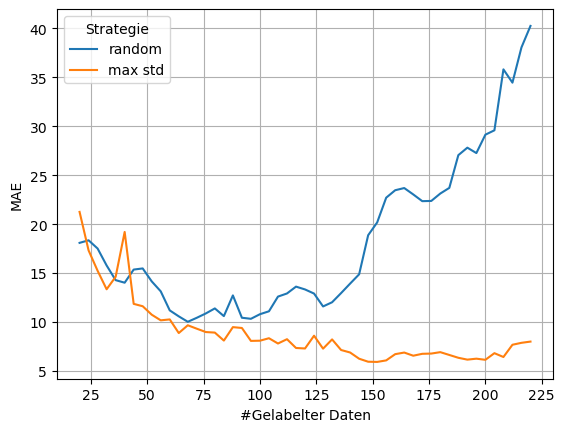

In [ ]:
# plot the results
plt.plot(np.arange(init_train_size, samples_per_iter*n_queries+init_train_size+1, samples_per_iter), performance_random, label='random')
plt.plot(np.arange(init_train_size, samples_per_iter*n_queries+init_train_size+1, samples_per_iter), performance, label='max std')
plt.ylabel('MAE')
plt.xlabel('#Gelabelter Daten')
plt.legend(title="Strategie")
plt.grid()
plt.show()

Je nach verwendetetem `random_state` kann es zu unterschiedlichen Ergebnissen kommen. Allerdings lässt sich im Allgemeinen feststellen, dass die Auswahl der Datenpunkte auf Basis der größten Standardabweichung in den Modellvorhersagen einen positiven Einfluss auf die Genauigkeit des Ensembles hat. Das Modell konvergiert schneller und interessanterweise tritt Overfitting erst deutlich später im Vergleich zur zufälligen Auswahl der Datenpunkte auf. Es ist jedoch wichtig zu beachten, dass dieses Verhalten nicht bei allen untersuchten Datensätzen festgestellt wurde, sodass diese Strategie nicht immer empfohlen werden kann. Um Active Learning effektiv einzusetzen, ist es wichtig, geeignete Modelle auszuwählen, einen angemessenen initialen Trainingsdatensatz zu verwenden und eine passende Sampling-Strategie zu wählen.

## Interactives Labeling mit Superintendent
Bisher sind wir in unseren Beispielen immer davon ausgegangen, dass man eine Art Orakel hat, welches einem das Label für einen Datenpunkt verrät. Meist existiert ein solches Orakel jedoch nicht und man muss selber als Mensch das richtige Label bestimmen.  Wie dieser "human -in-the-loop" Ansatz konkret aussehen und effizient umgesetzt werden kann, zeigt dieses Beispiel. Mit Hilfe der Bibliothek Superintendent lässt sich mit nur wenig Code ein interactives Widget zur Umsetzung des Activ Learning Cylces erzeugen. Als Beispielaufgabe wählen wir die Klassifikation der Ziffern von 0, 1, 2 und 3 auf dem MNIST Datensatz. Ziel ist es, die jeweilige handgeschriebene Ziffer korrekt zu erkennen.

### Imports
Neben den gängigen Python-Bibliotheken wie `numpy` und `pandas` sind in diesem Code insbesondere die Bibliotheken `sklearn`, `ipyannotations` und `superintendent` von Bedeutung. Wir nutzen `sklearn`, um Daten von OpenML mit `fetch_openml` zu laden und sie vorab mit `zoom` aus `scipy.ndimage` neu zu skalieren.

Die `ClassLabeller`-Klasse aus `ipyannotations.generic` stellt uns ein grundlegendes Widget zur Verfügung, mit dem wir Daten labeln können. Durch die Integration von `Superintendent` wird die Funktionalität dieses Widgets erweitert, um Active Learning verwenden zu können. Wir importieren auch das Modul `pickle`, um später unser Modell exportieren zu können. Um die Benutzerfreundlichkeit im Widget sicherzustellen, werden Warnungen mit `filterwarnings` unterdrückt.

In [ ]:
from ipyannotations.generic import ClassLabeller
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.ndimage import zoom
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from superintendent import Superintendent
from warnings import filterwarnings
filterwarnings("ignore")

### Laden der Daten
<!--
Die Daten beziehen wir mit Hilfe der `sklearn.datasets.fetch_openml` Funktion von [OpenML](https://www.openml.org/search?type=data&status=active&id=554).
Da wir ein recht simples Modell verwenden werden, skalieren wir die Daten von 28x28 auf 14x14 Pixel.
Zudem beschränken wir die Menge der Daten auf insgesamt 200 Bilder der Ziffern 0, 1, 2 und 3.
-->

Wir greifen auf die Daten mithilfe der `sklearn.datasets.fetch_openml`-Funktion von [OpenML](https://www.openml.org/search?type=data&status=active&id=554) zu. Da wir ein recht simples Modell verwenden, skalieren wir die Daten von 28x28 auf 14x14 Pixel herunter. Darüber hinaus beschränken wir die Datenauswahl auf insgesamt 200 Bilder, die die Ziffern 0, 1, 2 und 3 repräsentieren.

In [ ]:
X, y_true = fetch_openml('mnist_784', parser='auto', return_X_y=True, as_frame=False) #Download MNIST von OpenML
X = zoom(X.reshape(-1,28,28), (1,0.5,0.5)) #Reskaliert die Bilder von 28x28 zu 14x14
idx = np.where(y_true.astype(int) <= 3) # Bestimmt die Indizes für Bilder mit dem Label 0, 1, 2 oder 3
X, y_true = X[idx], y_true[idx] # Selektiert die Daten auf Instanzen der Ziffern 0, 1, 2 und 3
X, y_true = X[:200], y_true[:200] # Reduziert die Menge der Daten auf 200 Datenpunkte
print(f"{X.shape=}\t{y_true.shape=}")

X.shape=(200, 14, 14)	y_true.shape=(200,)


### Initialisiere Widget
Das Widget zum Labeln der Daten wird durch die Bibliothek `ipyannotations` bereitstellt und kann bereits auch als alleinstehendes Widget verwendet werden. `Superintendent` erweitert das Widget später lediglich um ein Modell und eine Sampling Strategie, und integriert so den Active Learning Cycle in das Widget.

Wir definieren vorab eine Methode zur Visualisierung eines einzelnen Datenpunkts und erzeugen damit eine Instanz der Klasse `ipyannotations.generic.ClassLabeller`.

In [ ]:
def plot_mnist(x):
    'Plottet ein Bild aud dem Datensatz MNIST'
    plt.figure(figsize=(3,3))
    plt.axis('off')
    plt.imshow(x, cmap="Greys_r")
    plt.show()

# Erzeugt das Widget
annotation_widget = ClassLabeller(
    options=range(4), # Liste alle Klassenlabels
    display_function=plot_mnist,
    allow_freetext=False
)

### 4. Integriere Widget in Active Learning Cycle <a id='#Integriere-Widget-in-Active-Learning-Cycle'></a>
Um eine Instanz der Klasse `Superintendent` zu erzeugen benötigen wir:
- die ungelabelten Daten
- ein Model, welches die Kriterien eines sklearn.BaseEstimator erfüllt
- ein Widget (hier empfiehlt es sich `ipyannotations.generic.ClassLabeller` zu verwenden)
- eine Funktion zur Bestimmung der Reihenfolge in welcher die Daten gelabelt werden sollen (alternativ per String eine vorimplementierte Funktion)
- optional eine Methode für die Vorverarbetung der Datenpunkte 

In [ ]:
model = SVC(
    kernel="linear",
    probability=True
)

def preprocess_mnist(x, y):
    return x.reshape(-1, 196), y

data_labeller = Superintendent(
    features=X,
    model=model,
    labelling_widget=annotation_widget,
    model_preprocess=preprocess_mnist, 
    acquisition_function='entropy',
)

data_labeller

Superintendent(children=(HBox(children=(HBox(children=(FloatProgress(value=0.0, description='Progress:', max=1…

Man muss zunächst ein paar Instanzen labeln bevor man ein erstes Model trainieren kann. Nach dem ersten Training werden dann die verbleibenden Daten (Bilder) entsprechend dem gewählten Entscheidungskriterium (hier: Entropy) sortiert und zum labeln angezeigt. Man kann per Klick auf `Retrain` jeder Zeit das Model neu trainieren. Wenn man sich selber nicht ganz sicher ist, um welche Ziffer es sich handeln soll kann man auch mit `Skip`  einzelne Beispiele überspringen. Mit `Undo` wird das Label für das letzte gelabelte Bild wieder zurückgesetzt. `Sort options` hat standardmäßig erstmal keine Funktion. <br> Der angezeigte Score wird durch eine 3-fold cross validation auf den bereits gelabelten Daten bestimmt.
Ist man mit dem Ergebnis zufrieden oder man hat alle Daten gelabelt, kann man das trainierte Model direkt weiter verwenden oder mit `pickle` exportieren. Außerdem sind die Labels in dem Attribut `new_labels` gespeichert und können exportiert werden.

In [ ]:
# # Speichert das Model als binäre Datei in ein File
with open("emit/mnist_model.pkl", "wb") as f:
    f.write(pickle.dumps(data_labeller.model))

# Exportiert die Labels aus dem Widget
y = np.array([int(i) if isinstance(i, str) else np.nan for i in data_labeller.new_labels])
np.save("emit/mnist_y.npy", y)
y

array([ 0.,  1.,  2.,  1.,  3.,  1., nan, nan, nan, nan, nan,  1.,  1.,
       nan,  3., nan,  3., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan,  1., nan, nan, nan, nan, nan, nan, nan,  1., nan, nan,  2.,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  3.,  1.,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,  3.,
       nan,  2., nan, nan, nan,  3., nan,  2., nan, nan, nan, nan, nan,
        3., nan, nan,  1., nan,  2., nan, nan, nan, nan, nan, nan,  3.,
       nan, nan,  3., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan,  0., nan, nan, nan, nan,  0., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  3., nan,
       nan, nan, nan, nan, nan, nan, nan,  1.,  1., nan, nan, nan, nan,
       nan, nan, nan, nan, nan,  2.,  3., nan, nan, nan, nan, nan, nan,
        1., nan,  2.,  3., nan, nan, nan, nan, nan,  1.,  2.,  2., nan,
        3., nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., na